# **To use Tensorflow Version 1**

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow
print(tensorflow.__version__)

1.15.2


# **Mount the Google Drive**

In [3]:
import os
from google.colab import drive
drive.mount('/content/drive')
#define your folder or create one in your google drive
root_path = '/content/drive/My Drive/ex_160/'
os.chdir(root_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **Record the time execution per code section**




In [4]:
!pip install ipython-autotime

%load_ext autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=f29c5df908c55cc761b7521c3903903329b3f47bebacc16d1bbee82b5445a8e1
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


#**Ngrok : Running tensorboard inside Google Colab**

In [0]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

In [0]:
import os
LOG_DIR = '/content/drive/My Drive/ex_20/log'
#LOG_DIR = 'runs'
os.makedirs(LOG_DIR, exist_ok=True)
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR))

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [0]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

# **Data Preparation**

In [5]:
# Downloading cifar-10-python files
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvzf cifar-10-python.tar.gz

--2020-04-20 11:12:55--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  30.9MB/s    in 5.9s    

2020-04-20 11:13:02 (27.5 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1
time: 15.9 s


In [6]:
# Provided on https://www.cs.toronto.edu/~kriz/cifar.html 
# Given a "pickled" file, returns a dictionary containing the image data
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

time: 2.08 ms


The training data is stored in four files, which are read and merged.

In [7]:
import numpy as np

for file_no in range(4):
    # Obtain data dictionary from each file
    filename = "cifar-10-batches-py/data_batch_" + str(file_no + 1)
    image_batch = unpickle(filename)
    # First file, create numpy arrays containing data & labels
    if file_no == 0:
        # Reshape to 32x32 image with 3 channels (RGB), which is made to be the last axes
        image_data = image_batch[b'data'].reshape((-1,3,32,32)).transpose((0,2,3,1))
        image_labels = image_batch[b'labels']
    else: # Concatenate to one file
        new_data = image_batch[b'data'].reshape((-1,3,32,32)).transpose((0,2,3,1))
        image_data = np.concatenate([image_data, new_data])
        image_labels = np.concatenate([image_labels, image_batch[b'labels']])

print("Training data shape: ",image_data.shape)

# Create numpy array containing test data
test_batch = unpickle("cifar-10-batches-py/test_batch")
test_data = test_batch[b'data'].reshape((-1,3,32,32)).transpose((0,2,3,1))
test_labels = test_batch[b'labels']

# Obtain label names from the meta data
label_names = unpickle("cifar-10-batches-py/batches.meta")[b'label_names']
label_names = [l.decode('UTF-8') for l in label_names]

Training data shape:  (40000, 32, 32, 3)
time: 367 ms


### **Image samples**

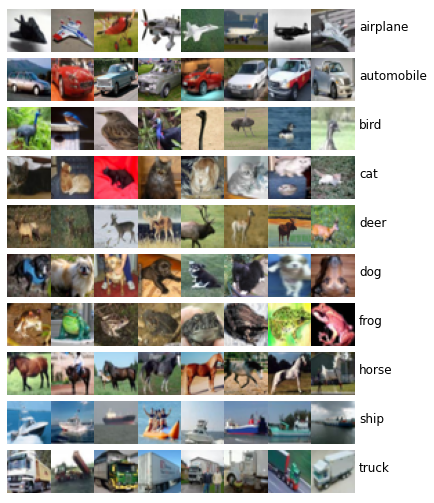

time: 2.23 s


In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10,9,figsize=(7,9))
plt.subplots_adjust(wspace=0.01, hspace=0.01)

for image_type in range(10):
    # Obtain indices of images in each group
    group = np.argwhere(image_labels == image_type)
    # Display 1st 5 images from each group
    for col in range(8):
        n = group[col][0]
        img_rgb = image_data[n]
        axes[image_type,col].imshow(img_rgb)
        axes[image_type,col].axis('off')
    # Display image labels    
    axes[image_type,8].axis('off')    
    axes[image_type,8].text(0.1,0.5,label_names[image_type], fontsize=12)

plt.show()

## Model Building
### Hyperparameters 

In [9]:
import tensorflow as tf
# Fixed hyperparameters
height = 32
width = 32
channels = 3
outputs = 10

n_epochs = 500
# number of epochs to try to get a lower loss before stopping
early_stop_rounds = 4

# number of iterations, within epoch, to do an accuracy check
acc_check = 25

# Variable Hyperparameters
hyperparam_range = {'filter1':[16, 32, 64, 96],
                    'kernelsize_1':[3, 4, 5],
                    'filter2':[48, 64, 96, 128],
                    'kernelsize_2':[3, 4, 5],
                    'filter3':[64, 96, 128],
                    'kernelsize_3':[3, 4, 5],
                    'hidden_1':[60, 100, 125],
                    'hidden_2':[80, 100, 125],
                    'activation':['relu', 'lrelu', 'elu'],
                    'learning_rate':[0.001, 0.0015, 0.002, 0.003],
                    'batch_size':[32, 64, 128],
                    'momentum':[0.9, 0.95, 0.99],
                    'p_reduct':[0],
                    'optimizer':['adam', 'rmsprop', 'nesterov']
                   }

# Calculate the number of hyperparamter grid points
first_item = True
for key,values in hyperparam_range.items():
    count = len(values)
    if first_item:
        display = str(count)
        total = count
        first_item = False
    else:
        display = display + ' X ' + str(count)
        total *= count

print('The total number of possible hyperparameter combinations is ' + display + ' = ' + "{:,}".format(total))

The total number of possible hyperparameter combinations is 4 X 3 X 4 X 3 X 3 X 3 X 3 X 3 X 3 X 4 X 3 X 3 X 1 X 3 = 3,779,136
time: 15.4 ms


### Convolutional Layer

In [10]:
def conv_layer(tensor_input, layer_no, filters, ksize, kstride, activation_unit, momentum, phase_train):
    # convolutional layer with batch normalisation and max pooling
    with tf.name_scope("conv_layer" + str(layer_no)):
        conv = tf.layers.conv2d(
            tensor_input,
            filters=filters,
            kernel_size=ksize,
            strides=[kstride,kstride],
            padding="SAME",
            activation=None
        )

        conv_bn = tf.layers.batch_normalization(
            inputs=conv,
            axis=-1,
            momentum=0.9,
            epsilon=0.001,
            center=True,
            scale=True,
            trainable=True,
            training = phase_train
        )

        #apply activation unit
        conv_bn_relu =  activation_unit(conv_bn)

        max_pool = tf.nn.max_pool(
            conv_bn_relu,
            ksize=[1,2,2,1],
            strides=[1,2,2,1],
            padding="VALID"
        )
            
        dropout = tf.layers.dropout(
            max_pool,
            training = phase_train
        )
            
        return dropout

time: 10.5 ms


### Graph defintion

In [11]:
def build_graph(hyperparam):
    # Retrieve hyperparamaters from dictionary   
    filter1 = hyperparam['filter1']
    kernelsize_1 = hyperparam['kernelsize_1']
    filter2 = hyperparam['filter2']
    kernelsize_2 = hyperparam['kernelsize_2']
    filter3 = hyperparam['filter3']
    kernelsize_3 = hyperparam['kernelsize_3']
    hidden_1 = hyperparam['hidden_1']
    hidden_2 = hyperparam['hidden_2']
    activation = hyperparam['activation']
    learning_rate = hyperparam['learning_rate']
    momentum = hyperparam['momentum']
    p_reduct =  hyperparam['p_reduct']
    optimizer_method = hyperparam['optimizer']
    
    patch_height = height - 2 * p_reduct
    patch_width = width - 2 * p_reduct
    
    if activation == 'elu':
        activation_unit = tf.nn.elu
    elif activation == 'lrelu':
        activation_unit = tf.nn.leaky_relu
    else:    
        activation_unit = tf.nn.relu
        
    graph = tf.Graph()
    with graph.as_default():
        X = tf.placeholder(shape=(None, patch_height, patch_width, channels), dtype=tf.float32)
        y = tf.placeholder(shape=(None), dtype=tf.int32)
        phase_train = tf.placeholder(tf.bool, name='phase_train')

        # 1st convolutional layer
        conv1 = conv_layer(X, 1, filter1, kernelsize_1, 2, activation_unit, momentum, phase_train)
        
        # 2nd convolutional layer
        conv2 = conv_layer(conv1, 2, filter2, kernelsize_2, 1, activation_unit, momentum, phase_train)
        
        # 3rd cnn
        conv3 = conv_layer(conv2, 3, filter3, kernelsize_3, 1, activation_unit, momentum, phase_train)
        
        # 1st fully connected (dense) layer
        fully_conn1 = tf.layers.dense(conv3, hidden_1, name="fully_conn1", activation=activation_unit)
        flat = tf.contrib.layers.flatten(fully_conn1)
        
        # 2nd fully connected layer
        fully_conn2 = tf.layers.dense(flat, hidden_2, name="fully_conn2", activation=activation_unit)
        
        # Output layer (no activation function, as this is built into cross-entropy)
        logits = tf.layers.dense(fully_conn2, outputs, name="logits")

        # Cross Entropy Loss
        with tf.name_scope("loss"):
            xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
            loss = tf.reduce_mean(xentropy, name="loss")

        # Training    
        with tf.name_scope("train"):
            if optimizer_method == 'rmsprop':
                    optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate, momentum=0.9)
            elif optimizer_method == 'nesterov':
                    optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.9, use_nesterov = True)
            else:    
                optimizer = tf.train.AdamOptimizer(learning_rate)
            training_op = optimizer.minimize(loss)
    
        # Initialization & Saver
        init = tf.global_variables_initializer()
        saver = tf.train.Saver() 
        
        return graph, X, y, phase_train, logits, loss, training_op, init, saver


time: 51.7 ms


### Model Training

In [12]:
# Function to train model, returns minimised loss
def train_model(batch_size = 128):
    training_size = image_data.shape[0]
    no_batches = training_size // batch_size
    
    with graph.as_default():
        # Ensure batch normalisation gets updated
        extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)    
        # Add Evaluation metrics
        with tf.name_scope("evaluation"):
            correct = tf.nn.in_top_k(logits, y, 1)
            accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
            acc_summary = tf.summary.scalar('Accuracy', accuracy)
            loss_summary = tf.summary.scalar('Loss', loss)
            
    # Initialise best loss for early stopping
    best_loss = 1e9
    best_acc = 1e9
    early_stopping = False
    
    # Run training
    with tf.Session(graph=graph) as sess:                     
        init.run()
        epoch = 0
        early_stop_count = 0
        # Initialise training accuracy sum
        sum_acc_train = 0.0
        sum_loss_train = 0.0
        count_train = 0
        while (epoch < n_epochs) and (not early_stopping):
            epoch += 1
            # Shuffle training data
            p = np.random.permutation(training_size)
            image_data_shuffle = image_data_patch[p]
            image_labels_shuffle = image_labels[p]
            for iteration in range(no_batches-1):
                # Train on mini-batch
                X_batch = image_data_shuffle[iteration * batch_size:(iteration + 1) * batch_size + 1]
                y_batch = image_labels_shuffle[iteration * batch_size:(iteration + 1) * batch_size + 1]
                sess.run([training_op, extra_update_ops], feed_dict={X: X_batch, y: y_batch, phase_train: True})
                # Evaluate model on current mini-batch
                if (iteration % acc_check == 0):
                    acc_train, loss_train = sess.run([accuracy, loss], feed_dict={X: X_batch,
                                                                                   y: y_batch,
                                                                                   phase_train: True})
                    # Update training average for current epoch
                    sum_acc_train += acc_train
                    sum_loss_train += loss_train
                    count_train += 1
                    mean_acc_train = sum_acc_train / count_train
                    mean_loss_train = sum_loss_train / count_train
                    print(epoch, iteration, "Train accuracy:", mean_acc_train, " Train loss:", mean_loss_train, end='\r')
                     
            # Print mean Train accuracy        
            print(epoch, iteration, "Train accuracy:", mean_acc_train, " Train loss:", mean_loss_train)
            train_summary = tf.Summary()
            train_summary.value.add(tag='eval/Accuracy', simple_value=mean_acc_train)
            train_summary.value.add(tag='eval/Loss', simple_value=mean_loss_train)
            file_writer_train.add_summary(train_summary, epoch)
            
            # Evaluate model on test data every epoch
            acc_test, loss_test, summary_str_acc_test, summary_str_loss_test = sess.run([accuracy, loss,
                                                                                         acc_summary,
                                                                                         loss_summary],
                                                                                        feed_dict={X: test_data_patch,
                                                                                                   y: test_labels,
                                                                                                   phase_train: False})
            # Check for mininimum loss
            if loss_test < best_loss:
                # Reset early stopping best loss and count
                best_loss = loss_test
                best_acc = acc_test
                best_train_acc = mean_acc_train
                best_train_loss = mean_loss_train
                early_stop_count = 0
                # Save model
                save_path = saver.save(sess, ckptfile)
            else:
                # Increment early stopping count
                early_stop_count += 1
            # Check if sufficient rounds (epochs) have passed without improvement
            if early_stop_count  > early_stop_rounds:
                # Flag early stopping, so training loop will stop
                early_stopping = True
                print("Early stopping, best loss: ", best_loss)
            else:    
                # Record and display test loss and accuracy
                file_writer_test.add_summary(summary_str_acc_test, epoch)
                file_writer_test.add_summary(summary_str_loss_test, epoch)
                print(epoch, "Test accuracy:", acc_test, " Test loss:", loss_test)
            
        # Return Best Loss obtaned and number of epochs
        return best_loss, best_acc, best_train_acc, best_train_loss, epoch

time: 85.5 ms


### Random Hyperparameter Selection and Evaluation

In [13]:
import pandas as pd

import random
random.seed(261001)

import os.path
if not os.path.exists('./log'):
    os.makedirs('./log')
if not os.path.exists('./graphs'):
    os.makedirs('./graphs')
    
if(os.path.isfile('./log/model_hyperparam.csv')):
    hyperparam_df = pd.read_csv('./log/model_hyperparam.csv')
    new_results_file = False
else:
    new_results_file = True

# Random Model search
for n in range(160):
    # Create log directory using current timestamp
    from datetime import datetime
    now = datetime.now().strftime("%Y%m%dT%H%M%S")
    root_logdir = "./log"
    root_graphdir = "./graphs"
    logdir = "{}/run-{}/".format(root_logdir, now)
    graphdir = "{}/run-{}/".format(root_graphdir, now)
    #root_modeldir = "./model"
    graphfile = graphdir
    ckptfile = graphdir + "checkpoint.ckpt"

    # Note that the graph is not written using same filewriter as the logging data.
    # This allows the logs to be viewed during training before the filewriter is closed
    file_writer_train = tf.summary.FileWriter(logdir + '/train')
    file_writer_test = tf.summary.FileWriter(logdir + '/test')
    file_writer_test = tf.summary.FileWriter(logdir + '/test')
    
    # tensorboard --logdir e:\Programming\TensorFlow\CIFAR-10\log
    # The command must be executed from same drive (E:) as the logdir

    tf.reset_default_graph()

    hyperparam_dict = {key:random.choice(values) for (key,values) in hyperparam_range.items()}
    print("Training Model with following hyperparameters:")
    print(hyperparam_dict)

    # Obtain graph and nodes required for training
    graph, X, y, phase_train, logits, loss, training_op, init, saver = build_graph(hyperparam = hyperparam_dict)
    
    # Write graph to file and close to avoid TensorBoard conflict
    file_writer_graph = tf.summary.FileWriter(graphfile, graph)
    file_writer_graph.close()

    # Extract image patches
    p_reduct =  hyperparam_dict['p_reduct']
    if p_reduct == 0:
        image_data_patch = image_data
        test_data_patch = test_data
    else:
        image_data_patch = image_data[:,p_reduct:-p_reduct,p_reduct:-p_reduct,:]
        test_data_patch = test_data[:,p_reduct:-p_reduct,p_reduct:-p_reduct,:]
    
    # Train the model
    best_loss, best_acc, best_train_acc, best_train_loss, no_epochs = train_model(batch_size = hyperparam_dict['batch_size'])
    
    # Add results to dictionary
    hyperparam_dict['best_loss'] = best_loss
    hyperparam_dict['best_acc'] = best_acc
    hyperparam_dict['best_train_acc'] = best_train_acc
    hyperparam_dict['best_train_loss'] = best_train_loss
    hyperparam_dict['no_epochs'] = no_epochs
    hyperparam_dict['logdir'] = logdir
    
    # Add results to dataframe
    if new_results_file:
        hyperparam_df = pd.DataFrame(hyperparam_dict, index=[0])
        new_results_file = False
    else:
        hyperparam_df = hyperparam_df.append(hyperparam_dict, ignore_index=True)
        
    # Write results file (don't wait until end, as next model may be interrupted)
    hyperparam_df.to_csv('./log/modelhyperparameter_160.csv', index=False)

    # Close filewriters
    file_writer_train.close()
    file_writer_test.close()
    
    # NOTE - From this point onwards there are only training logs.
    # Results and Conclusion are in a seperate notebook

Streaming output truncated to the last 5000 lines.
14 623 Train accuracy: 0.4541978128680161  Train loss: 1.4978492297445025
14 Test accuracy: 0.5059  Test loss: 1.3761647
15 623 Train accuracy: 0.4569846262335777  Train loss: 1.4933784262339274
15 Test accuracy: 0.5193  Test loss: 1.3093338
16 623 Train accuracy: 0.4592307802475989  Train loss: 1.4859227138757705
16 Test accuracy: 0.5606  Test loss: 1.2354448
17 623 Train accuracy: 0.46255204742445666  Train loss: 1.479328345971949
17 Test accuracy: 0.5389  Test loss: 1.2746998
18 623 Train accuracy: 0.46567522540688516  Train loss: 1.4717894424332514
18 Test accuracy: 0.5799  Test loss: 1.1944185
19 623 Train accuracy: 0.4672712668149095  Train loss: 1.467743078532972
19 Test accuracy: 0.4794  Test loss: 1.434722
20 623 Train accuracy: 0.46889231957495214  Train loss: 1.4636364696025848
20 Test accuracy: 0.5672  Test loss: 1.2185887
21 623 Train accuracy: 0.4714139316337449  Train loss: 1.46012131690979
21 Test accuracy: 0.5897  Test